In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
pb = sc.read_h5ad('data/pseudobulk_adata.h5ad')
wpb = sc.read_h5ad('data/weighted_pseudobulk_adata.h5ad')

# set donor 1
donor = '1_1'

# extract data for donor 1
pb_donor = np.array(pb[pb.obs['donor_id'] == donor].X)
wpb_donor = np.array(wpb[wpb.obs['donor_id'] == donor].X)

# calculate the mean
print('Regular pseudobulk mean for donor', donor, ':', np.mean(pb_donor))
print('Weighted pseudobulk mean for donor', donor, ':', np.mean(wpb_donor))

# calculate the max differewnce
print('Max difference:', np.max(np.abs(pb_donor - wpb_donor)))


Regular pseudobulk mean for donor 1_1 : 27.420547
Weighted pseudobulk mean for donor 1_1 : 27.420551
Max difference: 2664.5117


Shape of embeddings: (981, 256)
Number of NaN values: 0
Number of Inf values: 0

Embedding statistics:
Mean: -0.0649
Std: 2.2270
Min: -23.8819
Max: 13.3458

Number of values > 10: 2943


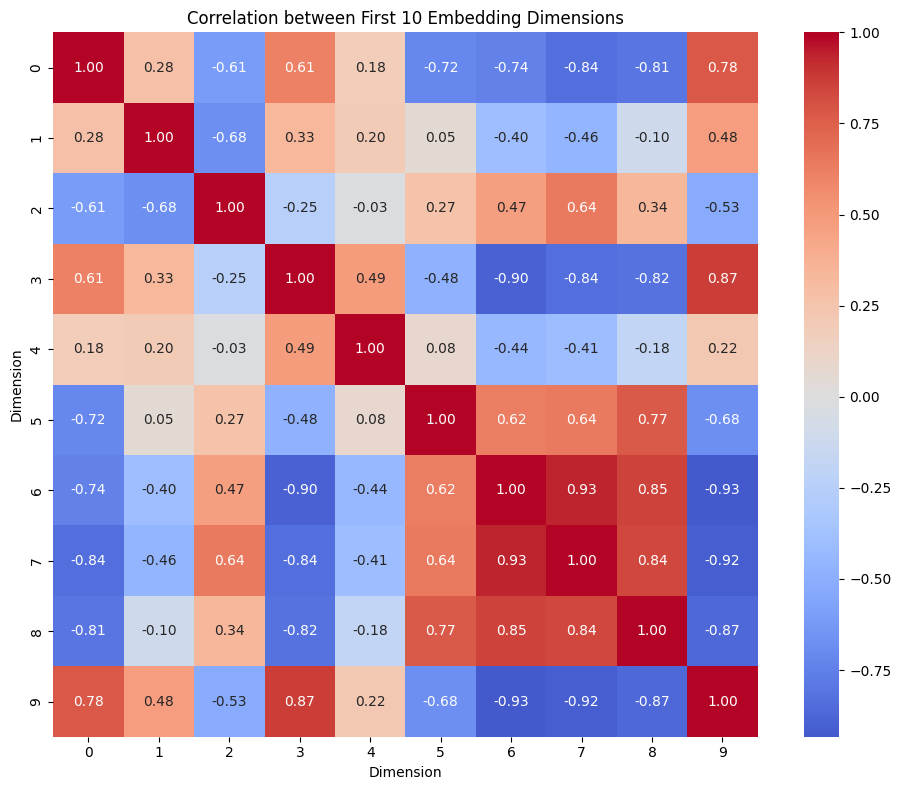

In [ ]:
# Load embeddings
embeddings = np.load('data/mean_embeddings_W.npy')

# Basic quality checks
print(f"Shape of embeddings: {embeddings.shape}")
print(f"Number of NaN values: {np.isnan(embeddings).sum()}")
print(f"Number of Inf values: {np.isinf(embeddings).sum()}")

# Check statistics
print("\nEmbedding statistics:")
print(f"Mean: {np.mean(embeddings):.4f}")
print(f"Std: {np.std(embeddings):.4f}")
print(f"Min: {np.min(embeddings):.4f}")
print(f"Max: {np.max(embeddings):.4f}")

# Check for any extreme values
threshold = 10  # Adjust based on expected range
extreme_values = np.sum(np.abs(embeddings) > threshold)
print(f"\nNumber of values > {threshold}: {extreme_values}")

# Check correlation between first few dimensions
correlation_matrix = np.corrcoef(embeddings[:100, :10].T)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            square=True)
plt.title('Correlation between First 10 Embedding Dimensions')
plt.xlabel('Dimension')
plt.ylabel('Dimension')
plt.tight_layout()
plt.show()
